# Graph Classification
This notebook aims to help better understand graph classification by defining a graph, computing the node and adjacency matrix from the graph, and using the node and adjacency matrix to define a graph classification neural network (GCN) to output a single scalar value.

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

### Define Graph
Define a graph that represents the chemical structure of ethanol. The node of each graph will be labelled with the node number along with it's corresponding element

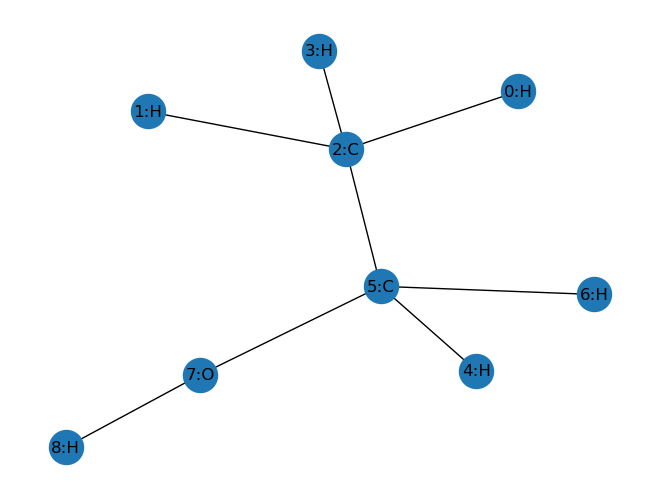

In [2]:
G = nx.Graph()
G.add_edge('0:H','2:C')
G.add_edge('1:H','2:C')
G.add_edge('3:H','2:C')
G.add_edge('2:C','5:C')
G.add_edge('4:H','5:C')
G.add_edge('6:H','5:C')
G.add_edge('7:O','5:C')
G.add_edge('8:H','7:O')
nx.draw(G, nx.spring_layout(G, seed = 0), with_labels=True, node_size=600)

### Draw Graph

In [3]:
plt.show()

### Define Edges and Nodes
Define the values of the nodes and edges from the graph

In [4]:
# Define Nodes
nodes = G.nodes()
# Define Edges
edges = G.edges()

### Define Adjacency Matrix
Using the nodes and edges from the graph, compute the adjacency matrix.

In [5]:
# Define array structure for adjacency matrix
A = np.zeros((9,9))

# Loop over all the edges and put 1 between nodes where an edge exists
for u, v in G.edges():
    i, j = int(u.split(':')[0]), int(v.split(':')[0])  # Convert labels to numerical indices
    A[i, j] = 1
    A[j, i] = 1

### Print the Adjacency Matrix

In [6]:
print(A)

[[0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]]


### Define Node Matrix
Define the node matrix, where each column of the node matrix represents a node and it's chemical element. The chemical element of each node is represented by the rows, where 118 rows are defined in the node matrix to represent the 118 possible atomic numbers for chemical elements.

In [7]:
# Define list structure for separated nodes
separated_nodes = []

# Define array structure for node matrix
X = np.zeros((118,9))

# Split the nodes into just its element
for u in G.nodes():
    i = (u.split(':')[1]) # Convert labels to element indices
    separated_nodes.append(i) 

# Loop over the separated nodes and update the node matrix based on which element each node represents
for i in range(len(separated_nodes)):  
    if separated_nodes[i] == 'H': 
        X[0, i] = 1
    elif separated_nodes[i] == 'C':
        X[5, i] = 1
    elif separated_nodes[i] == 'O':
        X[7, i] = 1

### Print Top 15 Node Matrix
Print the top 15 rows of the computed node matrix

In [8]:
print(X[0:15,:])

[[1. 0. 1. 1. 0. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Define the Rectified Linear Unit (ReLU) Function

In [9]:
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

### Define the Logistic Sigmoid Function

In [10]:
def sigmoid(x):
  return 1.0/(1.0+np.exp(-x))

### Define Hyperparameters
Define hyperparameters for the graph convolutional network, where K is the number of hidden layers and D is the dimensions of each hidden layer

In [11]:
K = 3; D = 200

### Initialize Parameter Matrices
Randomly initialize values for the parameter matrices by using He initialization

In [12]:
np.random.seed(1)
Omega0 = np.random.normal(size=(D, 118)) * 2.0 / D
beta0 = np.random.normal(size=(D,1)) * 2.0 / D
Omega1 = np.random.normal(size=(D, D)) * 2.0 / D
beta1 = np.random.normal(size=(D,1)) * 2.0 / D
Omega2 = np.random.normal(size=(D, D)) * 2.0 / D
beta2 = np.random.normal(size=(D,1)) * 2.0 / D
omega3 = np.random.normal(size=(1, D))
beta3 = np.random.normal(size=(1,1))

### Define Graph Convolutional Neural Network (GCN)
Define the graph convolutional neural network, which takes in the node matrix, adjacency matrix, and parameters as its input and outputs a single scalar number. Although the single scalar number doesn't have a definitive meaning in this GCN, the GCN can be trained to label a property of the chemical structure graph.

In [13]:
def graph_neural_network(A, X, Omega0, beta0, Omega1, beta1, Omega2, beta2, omega3, beta3):
  A_I = A + np.eye(len(A), dtype=float)
  hidden_layer_1 = ReLU(beta0 + Omega0 @ (X @ A_I))
  hidden_layer_2 = ReLU(beta1 + Omega1 @ (hidden_layer_1 @ A_I))
  hidden_layer_3 = ReLU(beta2 + Omega2 @ (hidden_layer_2 @ A_I))
  hidden_layer_3 = hidden_layer_3.mean(axis=1, keepdims=True)
  f = sigmoid(beta3 + (omega3 @ hidden_layer_3))

  return f

### Execute GCN
Using the initialized parameters, node matrix, and adjacency matrix, execute the GCN and print its output.

In [14]:
f = graph_neural_network(A,X, Omega0, beta0, Omega1, beta1, Omega2, beta2, omega3, beta3)
print("Computed value is %3.3f: "%(f[0,0]), "True value of f: 0.310843")

Computed value is 0.310:  True value of f: 0.310843


### Define Permutation Matrix
Define a permutation matrix, which is used to reorder the rows and columns of a matrix

In [15]:
P = np.array([[0,1,0,0,0,0,0,0,0],
              [0,0,0,0,1,0,0,0,0],
              [0,0,0,0,0,1,0,0,0],
              [0,0,0,0,0,0,0,0,1],
              [1,0,0,0,0,0,0,0,0],
              [0,0,1,0,0,0,0,0,0],
              [0,0,0,1,0,0,0,0,0],
              [0,0,0,0,0,0,0,1,0],
              [0,0,0,0,0,0,1,0,0]])

### Permutate Adjacency and Node Matrix
Perform a dot product with the permutation matrix and the adjacency matrix. Repeat for node matrix. By performing a dot product between a matrix and a permutation matrix, the rows and columns of the original matrix will be reordered

In [16]:
A_permuted = P @ A
X_permuted = X @ P

### Execute GCN with Permutated Adjacency and Node Matrix

In [17]:
f = graph_neural_network(A_permuted,X_permuted, Omega0, beta0, Omega1, beta1, Omega2, beta2, omega3, beta3)
print("Your value is %3.3f: "%(f[0,0]), "True value of f: 0.310843")

Your value is 0.310:  True value of f: 0.310843
